In [2]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
import statsmodels.formula.api as smf
import itertools
import seaborn as sns
import time

data = pd.read_csv('data/data.csv', index_col='Code')

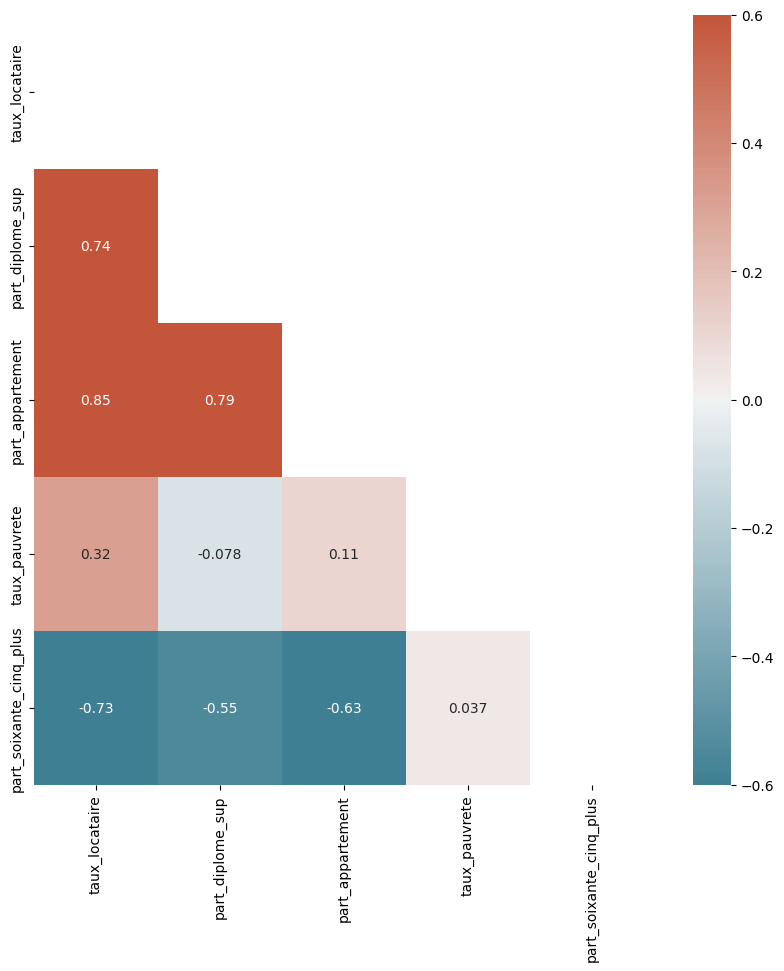

In [3]:
def corr_heatmap(_data):
    corr = _data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax = sns.heatmap(corr , cmap=cmap, vmin=-0.6, vmax=0.6, center=0,mask=mask,
            annot=True)
    

corr_heatmap(data[['taux_locataire', 'part_diplome_sup', 'part_appartement', 'taux_pauvrete', 'part_soixante_cinq_plus']])

In [4]:
"""def vif(variables):

    X = data[variables]

    vif = pd.DataFrame()
    vif['variable'] = X.columns

    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif

variables_exp = ['part_appartement','taux_chomage', 'mediane_niveau_vie', 'taux_urba', 'part_cadre_sup']


vif(variables_exp).sort_values('VIF', ascending=False)"""

'def vif(variables):\n\n    X = data[variables]\n\n    vif = pd.DataFrame()\n    vif[\'variable\'] = X.columns\n\n    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]\n\n    return vif\n\nvariables_exp = [\'part_appartement\',\'taux_chomage\', \'mediane_niveau_vie\', \'taux_urba\', \'part_cadre_sup\']\n\n\nvif(variables_exp).sort_values(\'VIF\', ascending=False)'

In [5]:
reg = smf.ols(formula='taux_locataire ~ mediane_niveau_vie + taille_moy_menage', data=data).fit()
print(reg.summary())
print(reg.condition_number)

PatsyError: Error evaluating factor: NameError: name 'mediane_niveau_vie' is not defined
    taux_locataire ~ mediane_niveau_vie + taille_moy_menage
                     ^^^^^^^^^^^^^^^^^^

In [ ]:
print(het_white(reg.resid, reg.model.exog))

(61.628117147685714, 5.598556779601202e-12, 32.27364975682885, 1.0473560390554257e-18)


In [ ]:
"""from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data= data.reset_index()
cible = np.array(data["taux_locataire"])

data = data.drop(['taux_locataire','Code'], axis=1)

liste_var = list(data.columns)

data = np.array(data)

x_train, x_test, y_train, y_test = train_test_split(data, cible, test_size=0.25, random_state=2020)

rf = RandomForestRegressor(n_estimators=100, random_state=2020)

rf.fit(x_train, y_train)

predictions = rf.predict(x_test)

erreurs = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_var[i] for i in indices])
plt.xlabel('Relative Importance')"""

'from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\ndata= data.reset_index()\ncible = np.array(data["taux_locataire"])\n\ndata = data.drop([\'taux_locataire\',\'Code\'], axis=1)\n\nliste_var = list(data.columns)\n\ndata = np.array(data)\n\nx_train, x_test, y_train, y_test = train_test_split(data, cible, test_size=0.25, random_state=2020)\n\nrf = RandomForestRegressor(n_estimators=100, random_state=2020)\n\nrf.fit(x_train, y_train)\n\npredictions = rf.predict(x_test)\n\nerreurs = abs(predictions - y_test)\nprint(\'Mean Absolute Error:\', round(np.mean(erreurs), 2))\nmape = 100 * (erreurs / y_test)\nprint(\'Mean Absolute Percentage Error :\', round(np.mean(mape), 2), \'%.\')\nimportances = rf.feature_importances_\nindices = np.argsort(importances)\n# style du graphique \nplt.style.use(\'fivethirtyeight\')\n%matplotlib inline\nplt.figure(1)\nplt.title(\'Feature Importances\')\nplt.barh(range(len(indices)), importances[indices], color=